# Bias VS Variance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

加载数据

In [2]:
data = scio.loadmat('ex5data1.mat')
train_x = data.get('X')
train_y = data.get('y')
val_x = data.get('Xval')
val_y = data.get('yval')
test_x = data.get('Xtest')
test_y = data.get('ytest')
train_x.shape, train_y.shape

((12, 1), (12, 1))

数据可视化

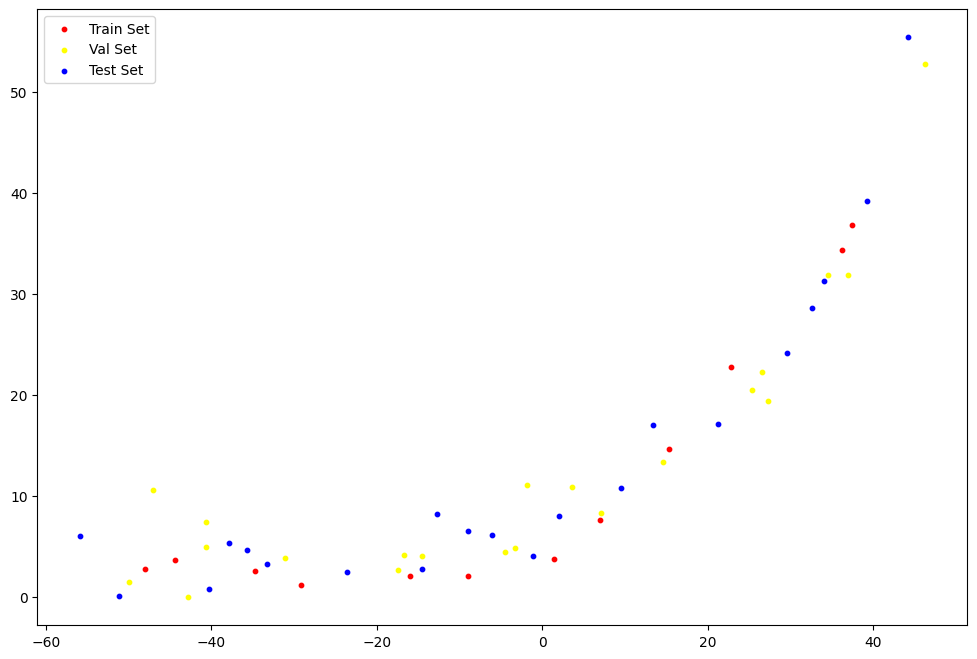

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(train_x, train_y, s=10, color="red", label="Train Set")
ax.scatter(val_x, val_y, s=10, color="yellow", label="Val Set")
ax.scatter(test_x, test_y, s=10, color="Blue", label="Test Set")
plt.legend(loc=2)
plt.show()

0.1 under
5 ok

In [81]:
from Bias import LinearRegression,loss,reg_loss,gradient,reg_gradient

epochs = 100
alpha = 0.05
regularize = False
scale = 0.1
x_norm = (train_x-train_x.mean(axis=0))/train_x.std(axis=0)
y_norm = (train_y-train_y.mean(axis=0))/train_y.std(axis=0)
train_loss = []
val_loss = []
test_loss = []
model = LinearRegression()
model.init_theta(shape=(1,2))
for epoch in range(epochs):
    pred = model(x_norm)
    g = reg_gradient(x_norm, pred, y_norm, model.theta, scale) if regularize else gradient(x_norm, pred, y_norm)
    model.optimize(g,alpha)

    theta = model.theta.copy()
    _theta = model.theta.copy()
    _theta[0, 1:] = _theta[0, 1:] / train_x.std(axis=0).T * train_y.std(axis=0)[0]
    _theta[0, 0] = _theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(_theta[0, 1:], train_x.mean(axis=0).T)
    # _theta[0, 0] = _theta[0, 0] - np.dot(_theta[0, 1:], train_x.mean(axis=0).T)
    model.load_parameters(_theta)
    pred = model(train_x)
    t_loss = reg_loss(pred,train_y,model.theta,scale) if regularize else loss(pred,train_y)
    train_loss.append(t_loss)
    pred_val = model(val_x)
    v_loss = reg_loss(pred_val,val_y,model.theta,scale) if regularize else loss(pred_val,val_y)
    val_loss.append(v_loss)

    test_pred = model(test_x)
    t_loss = reg_loss(test_pred, test_y, model.theta, scale)
    test_loss.append(t_loss)


    print("Epoch: {}/{}\tTrain Loss: {:.4f}\t\tVal Loss: {:.4f}\tTest Loss: {:.4f}".format(epoch, epochs,t_loss,v_loss, t_loss))
    model.load_parameters(theta)

# unscaling parameters
theta_f = np.zeros_like(model.theta)
theta_f[0, 1:] = model.theta[0, 1:] / train_x.std(axis=0).T * train_y.std(axis=0)[0]
theta_f[0, 0] = model.theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(theta_f[0, 1:], train_x.mean(axis=0).T)
theta_f

Epoch: 0/100	Train Loss: 96.7222		Val Loss: 76.8012	Test Loss: 96.7222
Epoch: 1/100	Train Loss: 90.8692		Val Loss: 71.8967	Test Loss: 90.8692
Epoch: 2/100	Train Loss: 85.5664		Val Loss: 67.4847	Test Loss: 85.5664
Epoch: 3/100	Train Loss: 80.7613		Val Loss: 63.5165	Test Loss: 80.7613
Epoch: 4/100	Train Loss: 76.4062		Val Loss: 59.9481	Test Loss: 76.4062
Epoch: 5/100	Train Loss: 72.4583		Val Loss: 56.7398	Test Loss: 72.4583
Epoch: 6/100	Train Loss: 68.8787		Val Loss: 53.8561	Test Loss: 68.8787
Epoch: 7/100	Train Loss: 65.6323		Val Loss: 51.2646	Test Loss: 65.6323
Epoch: 8/100	Train Loss: 62.6875		Val Loss: 48.9362	Test Loss: 62.6875
Epoch: 9/100	Train Loss: 60.0155		Val Loss: 46.8449	Test Loss: 60.0155
Epoch: 10/100	Train Loss: 57.5905		Val Loss: 44.9670	Test Loss: 57.5905
Epoch: 11/100	Train Loss: 55.3891		Val Loss: 43.2811	Test Loss: 55.3891
Epoch: 12/100	Train Loss: 53.3901		Val Loss: 41.7683	Test Loss: 53.3901
Epoch: 13/100	Train Loss: 51.5744		Val Loss: 40.4110	Test Loss: 51.5744
Ep

array([[13.07683026,  0.36560178]])

In [77]:
'''model.load_parameters(theta_f)
test_pred = model(test_x)
test_loss = reg_loss(test_pred, test_y, model.theta, scale)
print("Test Loss: {:.4f}".format(test_loss))'''

'model.load_parameters(theta_f)\ntest_pred = model(test_x)\ntest_loss = reg_loss(test_pred, test_y, model.theta, scale)\nprint("Test Loss: {:.4f}".format(test_loss))'

训练过程可视化

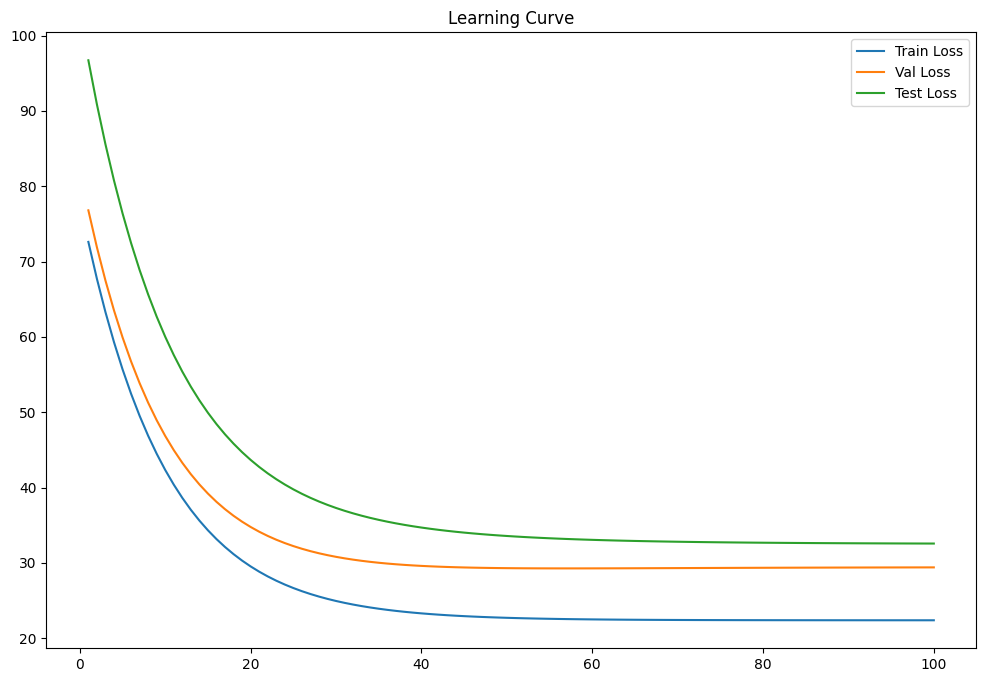

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epochs)+1, train_loss, label="Train Loss")
ax.plot(np.arange(epochs)+1, val_loss, label="Val Loss")
ax.plot(np.arange(epochs)+1, test_loss, label="Test Loss")
ax.set_title("Learning Curve")
plt.legend(loc=0)
plt.show()

决策边界

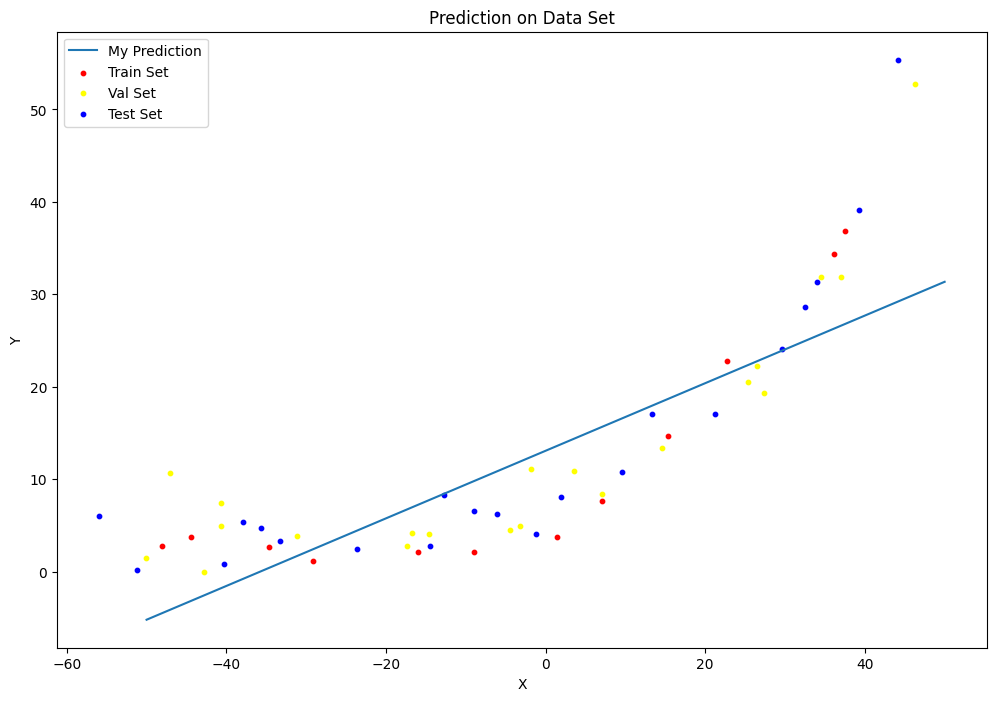

In [79]:
x = np.linspace(-50, 50, 100)
f = theta_f[0, 0] + (theta_f[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, label='My Prediction')
ax.scatter(train_x, train_y, s=10, color="red", label="Train Set")
ax.scatter(val_x, val_y, s=10, color="yellow", label="Val Set")
ax.scatter(test_x, test_y, s=10, color="Blue", label="Test Set")
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()

数据增强

In [38]:
def feature_mapping(x, degree):
    # feature = np.zeros([x.shape[0],1])
    feature = [np.power(x[:,0],i) for i in range(1, degree+1)]
    return np.array(feature).T

train_x_map = feature_mapping(train_x,8)
val_x_map = feature_mapping(val_x,8)
test_x_map = feature_mapping(test_x, 8)
train_x_map

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
         6.45059724e+04, -1.02801608e+06,  1.63832436e+07,
        -2.61095791e+08,  4.16102047e+09],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04,
         7.22323546e+05, -2.10578833e+07,  6.13900035e+08,
        -1.78970150e+10,  5.21751305e+11],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04,
         1.71527069e+06,  6.20748719e+07,  2.24646160e+09,
         8.12984311e+10,  2.94215353e+12],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04,
         1.97589159e+06,  7.40804977e+07,  2.77743990e+09,
         1.04132297e+11,  3.90414759e+12],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05,
         5.33448815e+06, -2.56369256e+08,  1.23208064e+10,
        -5.92123532e+11,  2.84567638e+13],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02,
         6.39194974e+03, -5.71533498e+04,  5.11034273e+05,
        -4.56939146e+06,  4.08570215e+07],
       [ 1.53077929e+01,  2.343285

epoch=200
scale=
0.2 过拟合
100 欠拟合
1 ok

In [112]:
from Bias import LinearRegression,loss,reg_loss,gradient,reg_gradient

epochs = 200
alpha = 0.2
regularize = True
scale = 1
x_norm = (train_x_map-train_x_map.mean(axis=0))/train_x_map.std(axis=0)
y_norm = (train_y-train_y.mean(axis=0))/train_y.std(axis=0)
train_loss = []
val_loss = []
test_loss = []
model = LinearRegression()
model.init_theta(shape=(1,9))
for epoch in range(epochs):
    pred = model(x_norm)
    g = reg_gradient(x_norm, pred, y_norm, model.theta, scale) if regularize else gradient(x_norm, pred, y_norm)
    model.optimize(g,alpha)

    theta = model.theta.copy()
    _theta = model.theta.copy()
    _theta[0, 1:] = _theta[0, 1:] / train_x_map.std(axis=0).T * train_y.std(axis=0)[0]
    _theta[0, 0] = _theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(_theta[0, 1:], train_x_map.mean(axis=0).T)
    # _theta[0, 0] = _theta[0, 0] - np.dot(_theta[0, 1:], train_x_map.mean(axis=0).T)
    model.load_parameters(_theta)
    pred = model(train_x_map)
    t_loss = reg_loss(pred,train_y,model.theta,scale) if regularize else loss(pred,train_y)
    train_loss.append(t_loss)
    pred_val = model(val_x_map)
    v_loss = reg_loss(pred_val,val_y,model.theta,scale) if regularize else loss(pred_val,val_y)
    val_loss.append(v_loss)
    test_pred = model(test_x_map)
    t_loss = reg_loss(test_pred, test_y, model.theta, scale)
    test_loss.append(t_loss)

    print("Epoch: {}/{}\tTrain Loss: {:.4f}\t\tVal Loss: {:.4f}\tTest Loss: {:.4f}".format(epoch, epochs,t_loss,v_loss,t_loss))
    model.load_parameters(theta)


theta_f = np.zeros_like(model.theta)
theta_f[0, 1:] = model.theta[0, 1:] / train_x_map.std(axis=0).T * train_y.std(axis=0)[0]
theta_f[0, 0] = model.theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(theta_f[0, 1:], train_x_map.mean(axis=0).T)
theta_f

Epoch: 0/200	Train Loss: 70.6551		Val Loss: 42.3710	Test Loss: 70.6551
Epoch: 1/200	Train Loss: 33.1952		Val Loss: 21.0553	Test Loss: 33.1952
Epoch: 2/200	Train Loss: 20.6112		Val Loss: 11.8350	Test Loss: 20.6112
Epoch: 3/200	Train Loss: 12.0240		Val Loss: 7.0248	Test Loss: 12.0240
Epoch: 4/200	Train Loss: 7.6029		Val Loss: 5.0592	Test Loss: 7.6029
Epoch: 5/200	Train Loss: 5.1084		Val Loss: 4.3755	Test Loss: 5.1084
Epoch: 6/200	Train Loss: 3.7705		Val Loss: 4.3606	Test Loss: 3.7705
Epoch: 7/200	Train Loss: 3.0691		Val Loss: 4.6137	Test Loss: 3.0691
Epoch: 8/200	Train Loss: 2.7152		Val Loss: 4.9535	Test Loss: 2.7152
Epoch: 9/200	Train Loss: 2.5499		Val Loss: 5.2851	Test Loss: 2.5499
Epoch: 10/200	Train Loss: 2.4822		Val Loss: 5.5706	Test Loss: 2.4822
Epoch: 11/200	Train Loss: 2.4632		Val Loss: 5.7978	Test Loss: 2.4632
Epoch: 12/200	Train Loss: 2.4664		Val Loss: 5.9680	Test Loss: 2.4664
Epoch: 13/200	Train Loss: 2.4780		Val Loss: 6.0879	Test Loss: 2.4780
Epoch: 14/200	Train Loss: 2.4912	

array([[6.36260479e+00, 2.91194534e-01, 6.74063316e-03, 7.36203849e-05,
        1.30717382e-06, 1.81501829e-08, 2.66749482e-10, 5.46047737e-12,
        3.97560019e-14]])

In [108]:
model.load_parameters(theta_f)
test_pred = model(test_x_map)
test_loss = reg_loss(test_pred, test_y, model.theta, scale)
print("Test Loss: {:.4f}".format(test_loss))

Test Loss: 31.8219


训练过程可视化

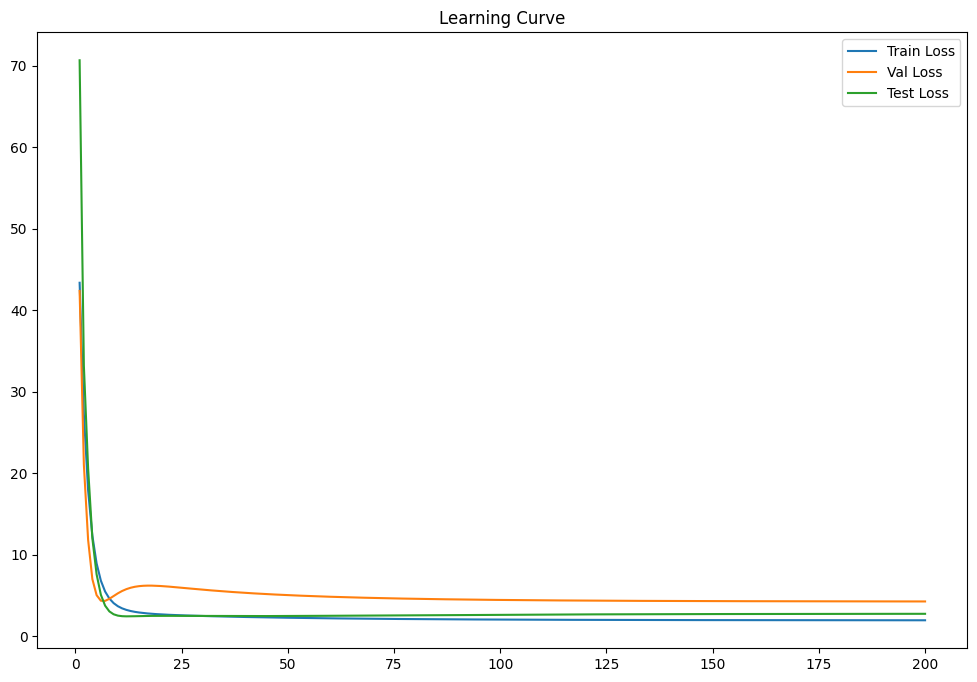

In [113]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epochs)+1, train_loss, label="Train Loss")
ax.plot(np.arange(epochs)+1, val_loss, label="Val Loss")
ax.plot(np.arange(epochs)+1, test_loss, label="Test Loss")
ax.set_title("Learning Curve")
plt.legend(loc=0)
plt.show()

决策边界可视化

[[6.36260479e+00 2.91194534e-01 6.74063316e-03 7.36203849e-05
  1.30717382e-06 1.81501829e-08 2.66749482e-10 5.46047737e-12
  3.97560019e-14]]


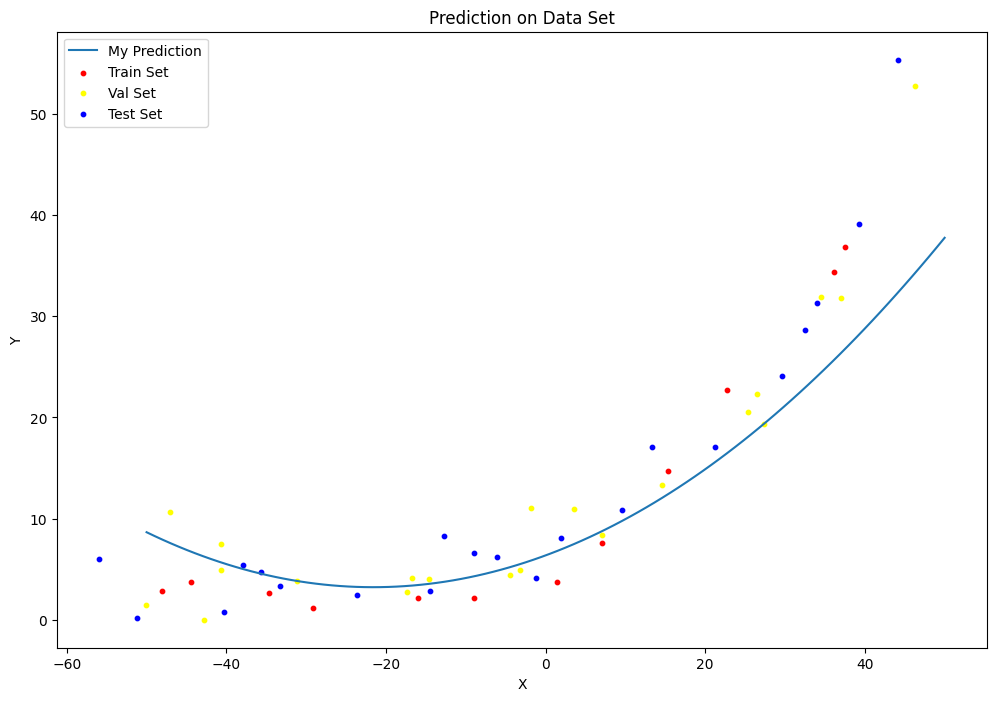

In [114]:
print(theta_f)
x = np.linspace(-50, 50, 100)
f = theta_f[0, 0] + (theta_f[0, 1] * x) + (theta_f[0, 2] * x ** 2)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, label='My Prediction')
ax.scatter(train_x, train_y, s=10, color="red", label="Train Set")
ax.scatter(val_x, val_y, s=10, color="yellow", label="Val Set")
ax.scatter(test_x, test_y, s=10, color="Blue", label="Test Set")
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()